In [74]:
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [75]:
data = pd.read_csv('train_data.csv')
len(data)


24535

In [76]:
x_train = data[['order_freight_value', 'product_description_lenght', 'product_photos_qty', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob','customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_train = data['review_score']

In [77]:
regr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=0)
regr.fit(x_train,y_train)
regr.feature_importances_

array([4.56372513e-02, 4.89539580e-02, 1.54741356e-02, 3.90765624e-02,
       8.60990173e-02, 6.73564684e-01, 5.63003418e-02, 9.08794012e-05,
       5.09472226e-04, 1.18742587e-04, 1.28252661e-04, 1.91080555e-03,
       1.09650270e-03, 1.35727481e-03, 1.40912258e-03, 1.69921824e-03,
       7.24979544e-04, 4.11461782e-03, 9.97296793e-04, 1.02621443e-03,
       9.53870080e-04, 3.55504834e-04, 1.39629438e-03, 3.80899565e-04,
       2.02317296e-03, 3.85726084e-03, 4.28722174e-04, 4.88094094e-04,
       1.58170834e-04, 2.71564565e-03, 2.23598594e-03, 3.41784090e-04,
       4.03892026e-03, 3.36344537e-04])

In [78]:
test_data = pd.read_csv('test_data.csv')
len(test_data)

16357

In [82]:
x_test = test_data[['order_freight_value', 'product_description_lenght', 'product_photos_qty', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob', 'customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_test = test_data['review_score']

In [83]:
predictions = (regr.predict(x_test))

In [90]:
test_data['Prediction'] = predictions
test_data.head()

,Unnamed: 0,order_products_value,order_freight_value,product_description_lenght,product_photos_qty,review_score,review_comment_message,delta_days,Classificacao,customer_state_AC,...,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,pos_prob,neg_prob,neu_prob,Prediction
0,40184,200.00,33.90,106,3,1,comprei 02 quadros cerveja paulaner em madeira...,19.0,-1,0,...,0,0,0,0,0,0,1.590326e-07,0.999960,0.000040,1.37
1,24091,44.95,17.93,555,1,3,muito rápido e bom,12.0,0,0,...,0,0,0,0,1,0,9.959738e-01,0.000274,0.003752,4.75
2,44807,212.13,35.28,854,2,5,bom,18.0,1,0,...,0,0,0,0,0,0,9.224321e-01,0.024375,0.053193,4.47
3,12564,59.90,20.77,641,2,1,boa tarde segunda vez que escrevo comprei 3 pr...,3.0,-1,0,...,0,0,0,0,1,0,1.231975e-04,0.890579,0.109298,2.35
4,46958,60.00,15.17,615,3,5,gosto muito de compra na loja lannister os pro...,12.0,1,0,...,0,0,0,0,0,0,9.994791e-01,0.000137,0.000384,4.68


In [91]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [92]:
1 - mean_squared_error(y_test, predictions) / np.var(y_test)

0.6521918793218704

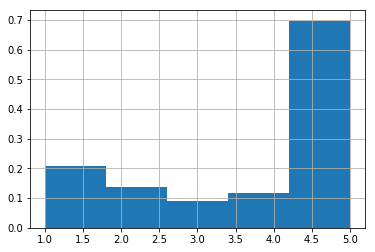

In [98]:
test_data['Prediction'].hist(bins=5, density=True)

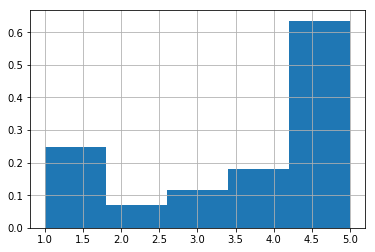

In [99]:
test_data['review_score'].hist(bins=5, density=True)

In [107]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [114]:
(confusion_matrix(test_data['review_score'], test_data['Prediction']))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [88]:
np.sqrt(mean_squared_error(y_test, predictions))

0.9366725779252748